# **Part 3d:** Classification with Few Neurons

In [7]:
# Public libraries
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import linear_model
from tqdm.notebook import tqdm

# Local libraries
import tools.classification as cl

## Parameters

In [8]:
num_features = range(1,11)

digits = ['zero','oh', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

keyword = 'seven'

kw_ind = digits.index(keyword)

num_words = len(digits)

dirnames = ['Results/TIDIGITS/layer_1/e-i/w0.5_tau0.5_dmax3/formants/',
            'Results/TIDIGITS/layer_1/e-i/w0.5_tau0.5_dmax3/output/',
            'Results/TIDIGITS/layer_1/tde/output/',
            'Results/TIDIGITS/layer_2/e-i/']

dir_inds = [[0],
            [1],
            [2],
            [3]
]

labels = ["Formants",
          "E-I layer 1",
          "TDEs",
          "E-I layer 2"]

## Train with Full Layers

In [9]:
# Result dictionaries
importance_results = {}

# Loop over result datasets
for i, inds in enumerate(tqdm(dir_inds, desc='Result sets')):

    #weight_ind = round(random.random() * (len(digits)-1))

    # Get names of directories
    dirs = []
    for ind in inds:
        dirs.append(dirnames[ind])

    # Result arrays
    trainscores = np.array([])
    testscores = np.array([])
        
    # Create classification model
    model = linear_model.LogisticRegression(solver = 'liblinear',
                                            multi_class = 'ovr')
    
    # Train model
    score_train = cl.train(model,
                           'all',
                           kw_ind,
                           num_words,
                           dirs,
                           scale_data = False)
    
    # Get feature importance
    importance_results[i] = cl.feature_importance(model,
                                                  kw_ind,
                                                  num_words,
                                                  dirs,
                                                  scale_data = False)

Result sets:   0%|          | 0/4 [00:00<?, ?it/s]

## Train with Selected Features

In [10]:
best_neurons = np.loadtxt('best_neurons.csv', delimiter=',')

num_layers = len(dirnames)
num_tests = len(num_features)

# Result dictionaries
scores_tr = np.zeros((num_layers, num_tests))
scores_te = np.zeros((num_layers, num_tests))

# Loop over network layers
for i, inds in enumerate(tqdm(dir_inds, desc='Result sets')):
    
    # Get best neuron
    best_neuron = best_neurons[i, kw_ind]
    
    # Loop over feature selection-sizes
    for j, n_feat in enumerate(num_features):
        
        # Get indices of selected features
        feature_inds = np.argsort(importance_results[i].importances_mean)[-n_feat:]
        
        # Add best neuron to selection
        if best_neuron not in feature_inds:
            feature_inds = np.append(best_neuron, feature_inds[:-1])
            feature_inds = feature_inds.astype(int)

        # Get names of directories
        dirs = []
        for ind in inds:
            dirs.append(dirnames[ind])
        
        # Create classification model
        model = linear_model.LogisticRegression(solver = 'liblinear',
                                                multi_class = 'ovr')
        
        # Train and test
        scores_tr[i,j] = cl.train(model, feature_inds, kw_ind, num_words, dirs, scale_data=False)
        scores_te[i,j], tpr, tnr = cl.test(model, feature_inds, kw_ind, num_words, dirs, scale_data=False)

Result sets:   0%|          | 0/4 [00:00<?, ?it/s]

## Accuracy Plot

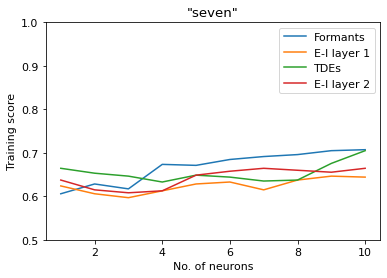

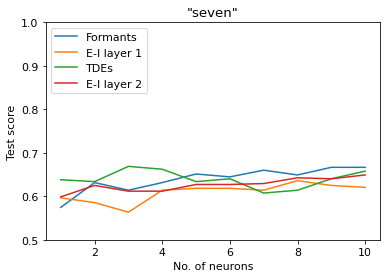

In [12]:
# Set figure font-size
plt.rcParams['font.size'] = '11'

# Loop over network layers
for i in range(len(labels)):
    
    plt.figure(1)    
    plt.plot(num_features, scores_tr[i,:], label=labels[i])
    #plt.errorbar(num_features, mean_dict_tr[i], std_dict_tr[i], label=labels[i])
    plt.xlabel("No. of neurons")
    plt.ylabel("Training score")
    plt.title('"' + keyword + '"')
    plt.ylim(0.5, 1)
    plt.legend(
        #loc = 'upper left'
    )
    #plt.savefig('Figures/selected_train_' + keyword + '.pdf')
    
    
    plt.figure(2)    
    plt.plot(num_features, scores_te[i,:], label=labels[i])
    #plt.errorbar(num_features, mean_dict_te[i], std_dict_te[i], label=labels[i])
    plt.xlabel("No. of neurons")
    plt.ylabel("Test score")
    plt.title('"' + keyword + '"')
    plt.ylim(0.5, 1)
    plt.legend(
        #loc = 'upper left'
    )
    plt.savefig('Figures/selected_test_' + keyword + '.pdf')